work nomber 2

In [ ]:
!pip install tensorflow_hub

In [17]:
import tensorflow as tf
import numpy as np
import tensorflow_hub as hub
import matplotlib.pyplot as plt
import os
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.resnet50 import ResNet50


In [18]:
import pandas as pd
from glob import glob
import seaborn as sns
import random
from keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import RMSprop,Adam
from sklearn.model_selection import train_test_split
print(tf.__version__)
from tensorflow import keras
from tensorflow.keras import layers
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
import datetime
from sklearn.metrics import classification_report, confusion_matrix

2.7.0


In [19]:
import keras
from keras import optimizers
import matplotlib.pyplot as plt
from tensorflow.keras import datasets, layers, models
from keras.layers import Activation
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense
from keras.preprocessing.image import ImageDataGenerator, load_img
from sklearn.metrics import classification_report, confusion_matrix

In [20]:
train=(r'C:\Users\natal\Desktop\chest_xray\train')
val=(r'C:\Users\natal\Desktop\chest_xray\val')
test=(r'C:\Users\natal\Desktop\chest_xray\test')

train_normal=(r'C:\Users\natal\Desktop\chest_xray\train\NORMAL')
train_pneumonia=(r'C:\Users\natal\Desktop\chest_xray\train\PNEUMONIA')
val_normal=(r'C:\Users\natal\Desktop\chest_xray\val\NORMAL')
val_pneumonia=(r'C:\Users\natal\Desktop\chest_xray\val\PNEUMONIA')

In [21]:
training_data_num1=ImageDataGenerator(rescale=1.0/255,
                                 rotation_range=45,
                                 width_shift_range=0.3,
                                 height_shift_range=0.4,
                                 zoom_range=0.4,
                                 )

validation_data_num1=ImageDataGenerator(rescale=1.0/255)

test_data_num1=ImageDataGenerator(rescale=1.0/255)

train_images  = (r'C:\Users\natal\Desktop\chest_xray\train')
validation_images= (r'C:\Users\natal\Desktop\chest_xray\val')




train_data = tf.keras.utils.image_dataset_from_directory(
    train_images, seed=3, validation_split=0.1, subset='training')
    
validation_Data = tf.keras.utils.image_dataset_from_directory(
    train_images, seed=3, validation_split=0.1, subset='validation')


train_generator_num1=training_data_num1.flow_from_directory(train,target_size=(180,180),batch_size=64,class_mode='binary')

val_generator_num1=validation_data_num1.flow_from_directory(val,target_size=(180,180),batch_size=64,class_mode='binary')

test_generator_num1=test_data_num1.flow_from_directory(test,target_size=(180,180),batch_size=64,class_mode='binary')

Found 5216 files belonging to 2 classes.
Using 4695 files for training.
Found 5216 files belonging to 2 classes.
Using 521 files for validation.
Found 5216 images belonging to 2 classes.
Found 16 images belonging to 2 classes.
Found 624 images belonging to 2 classes.


In [22]:
pretrainedModel__num1 = ResNet50(weights= 'imagenet', include_top=False, input_shape= (180,180,3))

for layers in pretrainedModel__num1.layers:
    layers.trainable = False

In [23]:
last_Layer=pretrainedModel__num1.get_layer('conv5_block3_1_relu')
output_last = last_Layer.output

x=tf.keras.layers.Flatten()(output_last)
x=tf.keras.layers.Dense(128,activation='relu')(x)
x=tf.keras.layers.Dropout(0.2)(x)
x=tf.keras.layers.Dense(64,activation='relu')(x)
x=tf.keras.layers.Dropout(0.2)(x)
x=tf.keras.layers.Dense(1,activation='sigmoid')(x)

Model_num1=tf.keras.Model(pretrainedModel__num1.input,x)

Model_num1.compile(optimizer=RMSprop(learning_rate=0.001),
              loss='binary_crossentropy',
               metrics=['accuracy','Precision','Recall'])

In [24]:
history_Num1=Model_num1.fit(train_generator_num1,validation_data=val_generator_num1,epochs=30,verbose=2)

Epoch 1/30
82/82 - 1123s - loss: 0.6563 - accuracy: 0.7195 - precision: 0.7453 - recall: 0.9455 - val_loss: 0.7447 - val_accuracy: 0.5000 - val_precision: 0.5000 - val_recall: 1.0000 - 1123s/epoch - 14s/step
Epoch 2/30
82/82 - 1079s - loss: 0.5780 - accuracy: 0.7423 - precision: 0.7432 - recall: 0.9979 - val_loss: 0.8873 - val_accuracy: 0.5000 - val_precision: 0.5000 - val_recall: 1.0000 - 1079s/epoch - 13s/step
Epoch 3/30
82/82 - 1077s - loss: 0.5506 - accuracy: 0.7423 - precision: 0.7428 - recall: 0.9992 - val_loss: 0.7940 - val_accuracy: 0.5000 - val_precision: 0.5000 - val_recall: 1.0000 - 1077s/epoch - 13s/step
Epoch 4/30
82/82 - 1074s - loss: 0.5350 - accuracy: 0.7429 - precision: 0.7429 - recall: 1.0000 - val_loss: 0.7097 - val_accuracy: 0.5000 - val_precision: 0.5000 - val_recall: 1.0000 - 1074s/epoch - 13s/step
Epoch 5/30
82/82 - 1071s - loss: 0.5154 - accuracy: 0.7429 - precision: 0.7429 - recall: 1.0000 - val_loss: 0.7170 - val_accuracy: 0.5000 - val_precision: 0.5000 - val_

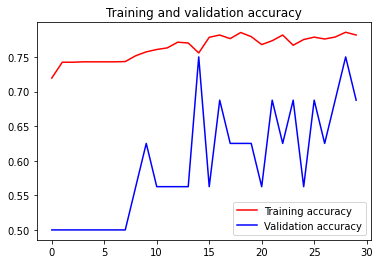

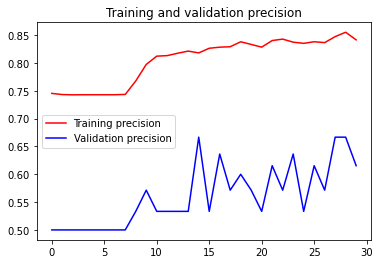

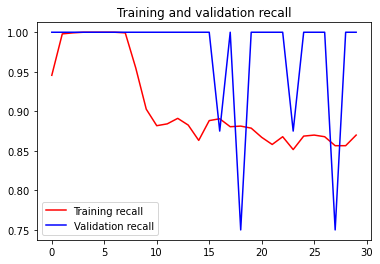

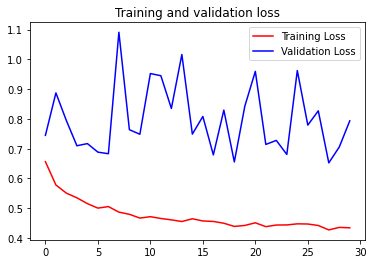

In [26]:
acc_Num1 = history_Num1.history['accuracy']
val_Num1 = history_Num1.history['val_accuracy']

train_precision_Num1=history_Num1.history['precision']
val_precision_Num1=history_Num1.history['val_precision']

train_recall_Num1=history_Num1.history['recall']
val_recall_Num1=history_Num1.history['val_recall']

loss_Num1 = history_Num1.history['loss']
val_loss_Num1 = history_Num1.history['val_loss']
epochs = range(len(acc_Num1))

plt.plot(epochs, acc_Num1, 'r', label='Training accuracy')
plt.plot(epochs, val_Num1, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.show()

plt.plot(epochs, train_precision_Num1, 'r', label='Training precision')
plt.plot(epochs, val_precision_Num1, 'b', label='Validation precision')
plt.title('Training and validation precision')
plt.legend()
plt.show()

plt.plot(epochs, train_recall_Num1, 'r', label='Training recall')
plt.plot(epochs, val_recall_Num1, 'b', label='Validation recall')
plt.title('Training and validation recall')
plt.legend()
plt.show()

plt.plot(epochs, loss_Num1, 'r', label='Training Loss')
plt.plot(epochs, val_loss_Num1, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

dict_keys(['loss', 'accuracy', 'precision', 'recall', 'val_loss', 'val_accuracy', 'val_precision', 'val_recall'])


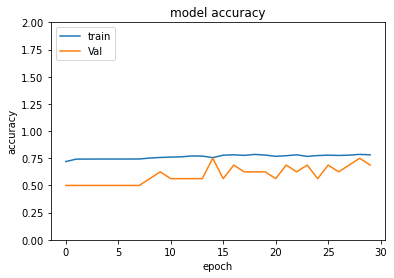

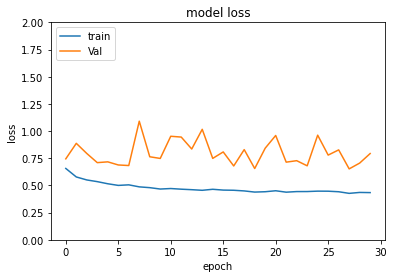

In [27]:
print(history_Num1.history.keys())
plt.plot(history_Num1.history['accuracy'])
plt.plot(history_Num1.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.ylim(0,2)

plt.xlabel('epoch')
plt.legend(['train', 'Val'], loc='upper left')

plt.show()
plt.plot(history_Num1.history['loss'])
plt.plot(history_Num1.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.ylim(0,2)
plt.xlabel('epoch')
plt.legend(['train', 'Val'], loc='upper left')

plt.show()

In [32]:
result_model_Num1 = Model_num1.evaluate_generator(test_generator_num1, 156)
print('loss  :', result_model_Num1[0])
print('accuracy  :', result_model_Num1[1])
print('Precision :', result_model_Num1[2])
print('Recall :', result_model_Num1[3])

C:\Users\natal\AppData\Local\Temp/ipykernel_1160/2016267099.py:1: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  result_model_Num1 = Model_num1.evaluate_generator(test_generator_num1, 156)


loss  : 0.4807284474372864
accuracy  : 0.7948718070983887
Precision : 0.7963801026344299
Recall : 0.9025641083717346


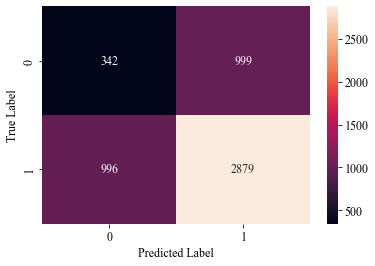

In [35]:
predictions_ResNet50 = Model_num1.predict(train_generator_num1) 

y_pred = predictions_ResNet50 > 0.5
y_true = train_generator_num1.classes 

import seaborn as sns

font = {
    'family': 'Times New Roman',
    'size': 12
}
plt.rc('font', **font)
mat = confusion_matrix(y_true, y_pred)
sns.heatmap(mat, annot=True, fmt="d")

plt.xlabel("Predicted Label", fontsize= 12)
plt.ylabel("True Label", fontsize= 12)

plt.show()

In [36]:
import sklearn.metrics

#Recall = TruePositives / (TruePositives + FalseNegatives)
#precision = TruePositives/(TruePositives+FalsePositives)

recall = sklearn.metrics.recall_score(y_true, y_pred, pos_label=1)
print(" The recall of model is:" ,recall)

precision = sklearn.metrics.precision_score(y_true, y_pred, pos_label=1)
print("The precision of the model is:" ,precision)

 The recall of model is: 0.7429677419354839
The precision of the model is: 0.7423929860752966


model 2

In [47]:
pretrained_model_Num2 = ResNet50(weights= 'imagenet', include_top=False, input_shape= (180,180,3))

#freazing the trained layers
for layers in pretrained_model_Num2.layers:
    layers.trainable = False
#pretrained_model2.summary()

i = 1
for layer in pretrained_model_Num2.layers:
  if i==int(i/87): #only the middle layer will be trainable
    layer.trainable = True
  i+=1
print("tesr")

tesr


In [48]:
Mid_Layers=pretrained_model_Num2.get_layer('conv5_block3_1_relu')
Mid_output = Mid_Layers.output

w=tf.keras.layers.Flatten()(Mid_output)
w=tf.keras.layers.Dense(128,activation='relu')(w)
w=tf.keras.layers.Dropout(0.2)(x)
w=tf.keras.layers.Dense(64,activation='relu')(w)
w=tf.keras.layers.Dropout(0.2)(x)
w=tf.keras.layers.Dense(1,activation='sigmoid')(w)

model_Num2=tf.keras.Model(pretrained_model_Num2.input,w)

model_Num2.compile(optimizer=RMSprop(learning_rate=0.001),
              loss='binary_crossentropy',
               metrics=['accuracy','Precision','Recall'])
# model2.summary()

In [49]:
train_generator_Num2 = train_generator_num1
val_generator_Num2   = val_generator_num1
test_generator_Num2  = test_generator_num1

In [50]:
history_Num2=model_Num2.fit(train_generator_Num2,validation_data=val_generator_Num2,epochs=30,verbose=2)

Epoch 1/30
82/82 - 1031s - loss: 0.6517 - accuracy: 0.7118 - precision: 0.7436 - recall: 0.9342 - val_loss: 0.9665 - val_accuracy: 0.5000 - val_precision: 0.5000 - val_recall: 1.0000 - 1031s/epoch - 13s/step
Epoch 2/30
82/82 - 1022s - loss: 0.5741 - accuracy: 0.7427 - precision: 0.7431 - recall: 0.9990 - val_loss: 0.7899 - val_accuracy: 0.5000 - val_precision: 0.5000 - val_recall: 1.0000 - 1022s/epoch - 12s/step
Epoch 3/30
82/82 - 1014s - loss: 0.5425 - accuracy: 0.7429 - precision: 0.7429 - recall: 1.0000 - val_loss: 0.7980 - val_accuracy: 0.5000 - val_precision: 0.5000 - val_recall: 1.0000 - 1014s/epoch - 12s/step
Epoch 4/30
82/82 - 1015s - loss: 0.5283 - accuracy: 0.7429 - precision: 0.7429 - recall: 1.0000 - val_loss: 0.7966 - val_accuracy: 0.5000 - val_precision: 0.5000 - val_recall: 1.0000 - 1015s/epoch - 12s/step
Epoch 5/30
82/82 - 1018s - loss: 0.5149 - accuracy: 0.7429 - precision: 0.7429 - recall: 1.0000 - val_loss: 0.6830 - val_accuracy: 0.5000 - val_precision: 0.5000 - val_

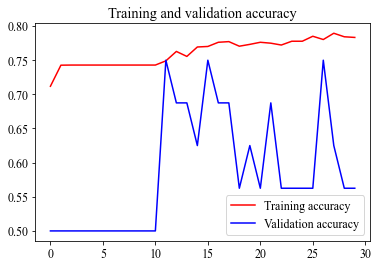

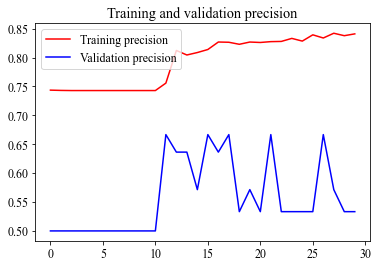

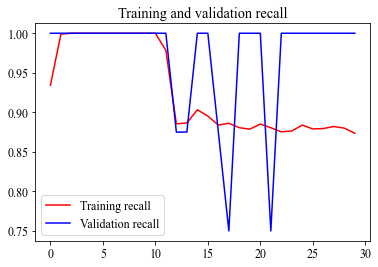

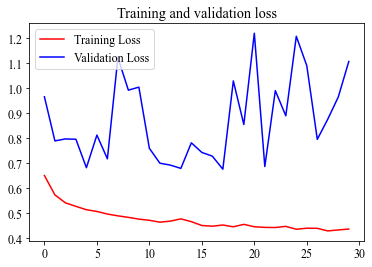

In [52]:
accuracy_num2 = history_Num2.history['accuracy']
val_num2 = history_Num2.history['val_accuracy']

train_precision_Num2=history_Num2.history['precision']
val_precision_Num2=history_Num2.history['val_precision']

train_recall_Num2=history_Num2.history['recall']
val_recall_Num2=history_Num2.history['val_recall']

loss_num2 = history_Num2.history['loss']
val_loss_num2 = history_Num2.history['val_loss']
epochs = range(len(accuracy_num2))

plt.plot(epochs, accuracy_num2, 'r', label='Training accuracy')
plt.plot(epochs, val_num2, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.show()

plt.plot(epochs, train_precision_Num2, 'r', label='Training precision')
plt.plot(epochs, val_precision_Num2, 'b', label='Validation precision')
plt.title('Training and validation precision')
plt.legend()
plt.show()

plt.plot(epochs, train_recall_Num2, 'r', label='Training recall')
plt.plot(epochs, val_recall_Num2, 'b', label='Validation recall')
plt.title('Training and validation recall')
plt.legend()
plt.show()

plt.plot(epochs, loss_num2, 'r', label='Training Loss')
plt.plot(epochs, val_loss_num2, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [55]:
result_model_Num2 = model_Num2.evaluate_generator(test_generator_Num2, 156)
print('loss  :', result_model_Num2[0])
print('accuracy  :', result_model_Num2[1])
print('Precision :', result_model_Num2[2])
print('Recall :', result_model_Num2[3])

C:\Users\natal\AppData\Local\Temp/ipykernel_1160/1871328480.py:1: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  result_model_Num2 = model_Num2.evaluate_generator(test_generator_Num2, 156)


loss  : 0.579778254032135
accuracy  : 0.6762820482254028
Precision : 0.6643356680870056
Recall : 0.9743589758872986


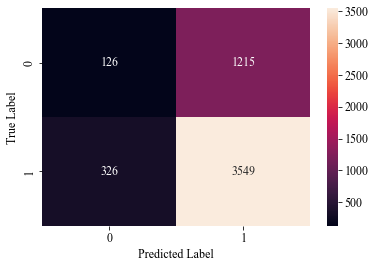

In [58]:
predictions_ResNet50 = model_Num2.predict(train_generator_Num2) 

y_pred = predictions_ResNet50 > 0.5
y_true = train_generator_Num2.classes 

import seaborn as sns

font = {
    'family': 'Times New Roman',
    'size': 12
}
plt.rc('font', **font)
mat = confusion_matrix(y_true, y_pred)
sns.heatmap(mat, annot=True, fmt="d")

plt.xlabel("Predicted Label", fontsize= 12)
plt.ylabel("True Label", fontsize= 12)

plt.show()

In [59]:
import sklearn.metrics

#Recall = TruePositives / (TruePositives + FalseNegatives)
#precision = TruePositives/(TruePositives+FalsePositives)

recall = sklearn.metrics.recall_score(y_true, y_pred, pos_label=1)
print(" The recall of model is:" ,recall)

precision = sklearn.metrics.precision_score(y_true, y_pred, pos_label=1)
print("The precision of the model is:" ,precision)

 The recall of model is: 0.9158709677419354
The precision of the model is: 0.7449622166246851


model 3

In [70]:
pretrained_model_Num3 = ResNet50(weights= 'imagenet', include_top=False, input_shape= (180,180,3))

for layers in pretrained_model_Num3.layers:
    layers.trainable = False

i = 1
for layer in pretrained_model_Num3.layers:
  if i==int(i/173): #only the last layer will be trainable
    layer.trainable = True
  i+=1

In [76]:
last_layer_train=pretrained_model_Num3.get_layer('conv5_block3_1_relu')
last_output = last_layer_train.output

x=tf.keras.layers.Flatten()(last_output)
x=tf.keras.layers.Dense(128,activation='relu')(x)
x=tf.keras.layers.Dropout(0.2)(x)
x=tf.keras.layers.Dense(64,activation='relu')(x)
x=tf.keras.layers.Dropout(0.2)(x)
x=tf.keras.layers.Dense(1,activation='sigmoid')(x)

model_Num3=tf.keras.Model(pretrained_model_Num3.input,x)

model_Num3.compile(optimizer=RMSprop(learning_rate=0.0001),
              loss='binary_crossentropy',
               metrics=['accuracy','Precision','Recall'])

In [77]:
train_generator_num3 = train_generator_num1
val_generator_num3   = val_generator_num1
test_generator_num3  = test_generator_num1

In [78]:
history_Num3=model_Num3.fit(train_generator_num3,validation_data=val_generator_num3,epochs=30,verbose=2)l

Epoch 1/30
82/82 - 1163s - loss: 0.5776 - accuracy: 0.7396 - precision: 0.7427 - recall: 0.9938 - val_loss: 0.8646 - val_accuracy: 0.5000 - val_precision: 0.5000 - val_recall: 1.0000 - 1163s/epoch - 14s/step
Epoch 2/30
82/82 - 1042s - loss: 0.5639 - accuracy: 0.7429 - precision: 0.7429 - recall: 1.0000 - val_loss: 0.7920 - val_accuracy: 0.5000 - val_precision: 0.5000 - val_recall: 1.0000 - 1042s/epoch - 13s/step
Epoch 3/30
82/82 - 1038s - loss: 0.5459 - accuracy: 0.7429 - precision: 0.7429 - recall: 1.0000 - val_loss: 0.7466 - val_accuracy: 0.5000 - val_precision: 0.5000 - val_recall: 1.0000 - 1038s/epoch - 13s/step
Epoch 4/30
82/82 - 1027s - loss: 0.5310 - accuracy: 0.7435 - precision: 0.7438 - recall: 0.9987 - val_loss: 0.6861 - val_accuracy: 0.5000 - val_precision: 0.5000 - val_recall: 1.0000 - 1027s/epoch - 13s/step
Epoch 5/30
82/82 - 1034s - loss: 0.5148 - accuracy: 0.7435 - precision: 0.7444 - recall: 0.9972 - val_loss: 0.7923 - val_accuracy: 0.5000 - val_precision: 0.5000 - val_

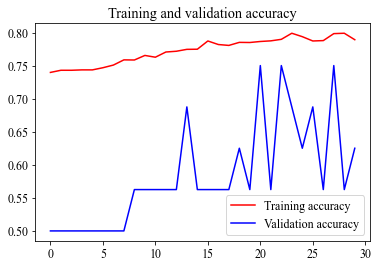

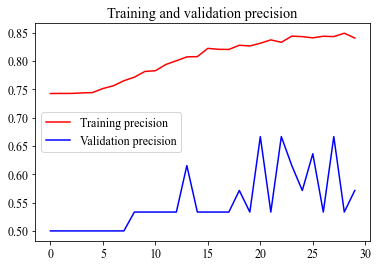

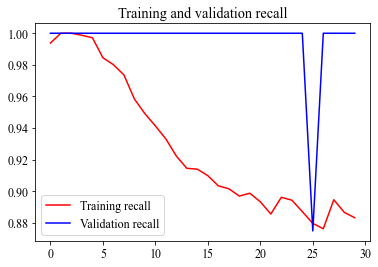

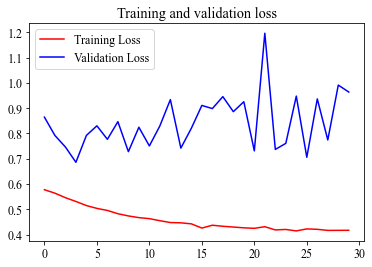

In [80]:
accuracy_num3 = history_Num3.history['accuracy']
val_num3 = history_Num3.history['val_accuracy']

train_precision_3=history_Num3.history['precision']
val_precision_3=history_Num3.history['val_precision']

train_recall_3=history_Num3.history['recall']
val_recall_3=history_Num3.history['val_recall']

loss_num3 = history_Num3.history['loss']
val_loss_num3 = history_Num3.history['val_loss']
epochs = range(len(accuracy_num3))

plt.plot(epochs, accuracy_num3, 'r', label='Training accuracy')
plt.plot(epochs, val_num3, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.show()

plt.plot(epochs, train_precision_3, 'r', label='Training precision')
plt.plot(epochs, val_precision_3, 'b', label='Validation precision')
plt.title('Training and validation precision')
plt.legend()
plt.show()

plt.plot(epochs, train_recall_3, 'r', label='Training recall')
plt.plot(epochs, val_recall_3, 'b', label='Validation recall')
plt.title('Training and validation recall')
plt.legend()
plt.show()

plt.plot(epochs, loss_num3, 'r', label='Training Loss')
plt.plot(epochs, val_loss_num3, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

dict_keys(['loss', 'accuracy', 'precision', 'recall', 'val_loss', 'val_accuracy', 'val_precision', 'val_recall'])


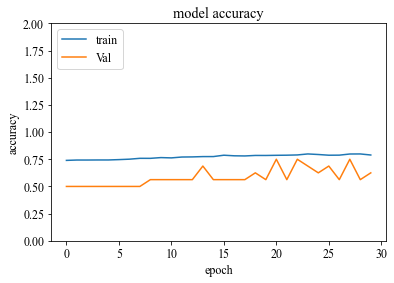

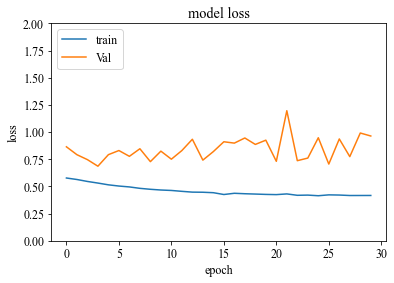

In [81]:
print(history_Num3.history.keys())
plt.plot(history_Num3.history['accuracy'])
plt.plot(history_Num3.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.ylim(0,2)

plt.xlabel('epoch')
plt.legend(['train', 'Val'], loc='upper left')

plt.show()
# summarize history for loss
plt.plot(history_Num3.history['loss'])
plt.plot(history_Num3.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.ylim(0,2)
plt.xlabel('epoch')
plt.legend(['train', 'Val'], loc='upper left')

plt.show()

In [82]:
result_num3 = model_Num3.evaluate_generator(test_generator_num3, 624)
print('loss  :', result_num3[0])
print('accuracy  :', result_num3[1])
print('Precision :', result_num3[2])
print('Recall :', result_num3[3])

C:\Users\natal\AppData\Local\Temp/ipykernel_1160/243070335.py:1: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  result_num3 = model_Num3.evaluate_generator(test_generator_num3, 624)


loss  : 0.5023061037063599
accuracy  : 0.7676281929016113
Precision : 0.7454909682273865
Recall : 0.9538461565971375


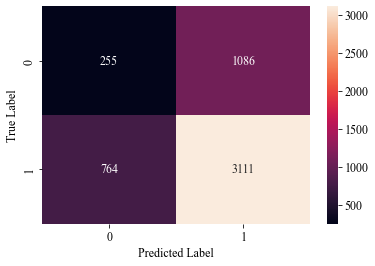

In [85]:
predictions_ResNet50 = model_Num3.predict(train_generator_num3) 

y_pred = predictions_ResNet50 > 0.5
y_true = train_generator_num3.classes 

import seaborn as sns

font = {
    'family': 'Times New Roman',
    'size': 12
}
plt.rc('font', **font)
mat = confusion_matrix(y_true, y_pred)
sns.heatmap(mat, annot=True, fmt="d")

plt.xlabel("Predicted Label", fontsize= 12)
plt.ylabel("True Label", fontsize= 12)

plt.show()

In [86]:
import sklearn.metrics

#Recall = TruePositives / (TruePositives + FalseNegatives)
#precision = TruePositives/(TruePositives+FalsePositives)

recall = sklearn.metrics.recall_score(y_true, y_pred, pos_label=1)
print(" The recall of model is:" ,recall)

precision = sklearn.metrics.precision_score(y_true, y_pred, pos_label=1)
print("The precision of the model is:" ,precision)

 The recall of model is: 0.8028387096774193
The precision of the model is: 0.7412437455325233
